In [2]:
import sys
# This is done to add "grammy" module to path
sys.path.append("../")

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from grammy.billboard import get_filename_billboard_data_all_years
from grammy.defines import CSV_QUOTE, CSV_SEP
from grammy.grammy import get_filename_grammy_albums_of_the_year
from grammy.metacritic import get_filename_metacritic_grammy_info

sns.set_theme(style="whitegrid")

# Data loading/treatment

In [5]:
grammy_albums_of_the_year_path = get_filename_grammy_albums_of_the_year("csv")
grammy_albums_of_the_year = pd.read_csv(
    grammy_albums_of_the_year_path, encoding="utf-8", sep=CSV_SEP, quotechar=CSV_QUOTE
)
grammy_albums_of_the_year["album"] = grammy_albums_of_the_year["album"].str.lower()

grammy_albums_path = get_filename_metacritic_grammy_info("csv")
grammy_albums = pd.read_csv(
    grammy_albums_path, encoding="utf-8", sep=CSV_SEP, quotechar=CSV_QUOTE
)
grammy_albums["album"] = grammy_albums["album"].str.lower()

grammy_albums_merged = pd.merge(grammy_albums_of_the_year, grammy_albums, on="album")
grammy_albums_merged = grammy_albums_merged.drop(columns=["artist_x"])
grammy_albums_merged = grammy_albums_merged.rename(columns={"artist_y": "artist"})
# grammy_albums_merged['mean'] = grammy_albums_merged.groupby('year')['metascore'].transform('mean')
# grammy_albums_merged['max'] = grammy_albums_merged.groupby('year')['metascore'].transform('max')
# grammy_albums_merged['min'] = grammy_albums_merged.groupby('year')['metascore'].transform('min')

# Notas no metacritic dos álbums indicados ao Grammy

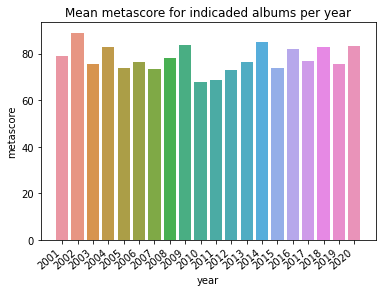

In [9]:
grammy_albums_mean_year = grammy_albums_merged.groupby(["year"]).mean().reset_index()

plt.figure()  # 1
ax = sns.barplot(x="year", y="metascore", data=grammy_albums_mean_year)
ax.set_title("Mean metascore for indicaded albums per year")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.plot()
plt.show()

# Nota do metacritic dos vencedores do Grammy por ano

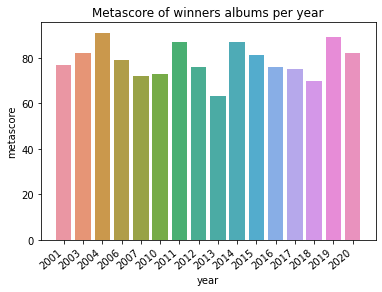

In [10]:
# graph 02
grammy_albums_winners = grammy_albums_merged.loc[grammy_albums_merged["won"] == 1]

plt.figure()  # 2
bx = sns.barplot(x="year", y="metascore", data=grammy_albums_winners)
bx.set_title("Metascore of winners albums per year")
bx.set_xticklabels(bx.get_xticklabels(), rotation=40, ha="right")

plt.plot()
plt.show()

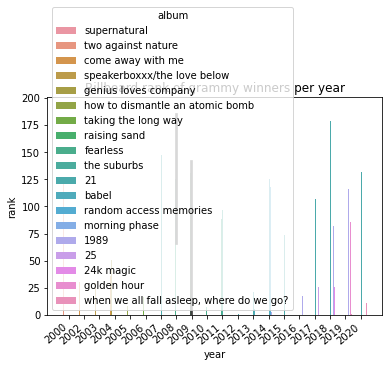

In [11]:
# ----------------------------------------------------------------------------------------
# graph 03 - NOT READY
billboard_albums_path = get_filename_billboard_data_all_years("csv")
billboard_albums = pd.read_csv(
    billboard_albums_path, encoding="utf-8", sep=CSV_SEP, quotechar=CSV_QUOTE
)
billboard_albums["album"] = billboard_albums["album"].str.lower()
grammy_billboard_merged = pd.merge(grammy_albums_of_the_year, billboard_albums, on="album")
grammy_billboard_merged = grammy_billboard_merged.drop(columns=["artist_x"])
grammy_billboard_merged = grammy_billboard_merged.rename(
    columns={"artist_y": "artist", "year_y": "year"}
)
grammy_billboard_winners = grammy_billboard_merged.loc[grammy_billboard_merged["won"] == 1]

plt.figure()  # 3
bx = sns.barplot(x="year", y="rank", hue="album", data=grammy_billboard_winners)
bx.set_title("Billboard rank of grammy winners per year")
bx.set_xticklabels(bx.get_xticklabels(), rotation=40, ha="right")

plt.plot()
plt.show()

# Número de indicações ao Grammy por artistas

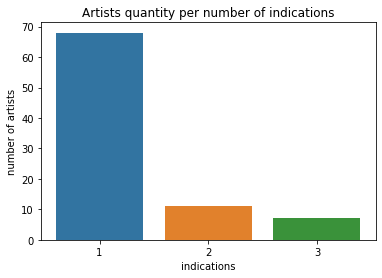

In [12]:
grammy_indicated_artists = grammy_albums_of_the_year.groupby(["artist"]).count().reset_index()
indication_df = grammy_indicated_artists["year"].value_counts()
indication_df = indication_df.to_frame()

plt.figure()  # 4 - NOT READY
cx = sns.barplot(x=indication_df.index, y="year", data=indication_df)
cx.set_title("Artists quantity per number of indications")
cx.set(xlabel="indications", ylabel="number of artists")

plt.plot()
plt.show()